<a href="https://colab.research.google.com/github/jennifer060697/AI15_Project/blob/main/project%201%20_%20games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', usecols = range(1,10))

Name : 게임의 이름  
Platform : 게임이 지원되는 플랫폼의 이름  
Year : 게임이 출시된 연도  
Genre : 게임의 장르  
Publisher : 게임을 제작한 회사  
NA_Sales : 북미지역에서의 출고량  
EU_Sales : 유럽지역에서의 출고량  
JP_Sales : 일본지역에서의 출고량  
Other_Sales : 기타지역에서의 출고량  

main : 다음 분기에 어떤 게임을 설계해야 할까  
1. 지역에 따라서 선호하는 게임 장르가 다를까  
2. 연도별 게임의 트렌드가 있을까  
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스  

Sprint 1 : EDA, Feature Engineering, Data Manipulation,  Data Visualization  
Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test  
Sprint 3 : DR, PCA, Clustering, GD  

In [374]:
df.info()

# Year -> int
# Platform, Genre, Publisher -> 카테고리컬
# NA_Sales ~ Other_Sales -> M단위로 변경. 0.몇 으로 나와있는건 모두 M 단위라고 예상하고 K 값들은 /1000을 해서 변경한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [375]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

# --------------------------------------결측치 보완 아이디어------------------------------------------

In [376]:
# 년도는 파악이 어렵다.
# 장르와 퍼블리셔의 경우 동일 시리즈의 경우 동일 장르, 동일 퍼블리셔라고 볼 수 있다.
# 시리즈는 Name 이 시리즈명:부제 로 이루어져 있으므로 동일 시리즈의 다른 게임들을 확인해볼 수 있다.

# 장르/퍼블리셔 결측치
# series = Name 을 : 로 슬라이싱[0]
# series 가 제목에 포함된 게임들의 장르를 배열에 저장
# 가장 많은 장르를 선정 : collections 모듈의 Counter 사용

# 물론 여러 게임사 사정에 의해 같은 시리즈물이 다른 퍼블리셔로 출시됐을 수도 있고, 다른 장르의 스핀오프로 출시된걸수도 있다.

In [377]:
df[df.Publisher.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


In [378]:
df[df.Name.str.find('Super Robot Wars OG Saga')!=-1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3894,Super Robot Wars OG Saga: Masou Kishin - The L...,DS,2010.0,Strategy,Namco Bandai Games,0,0,0.12,0
10627,Super Robot Wars OG Saga Masou Kishin F: Coffi...,PS3,2014.0,Strategy,Namco Bandai Games,0,0,0.06,0
16130,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0,0,0.12,0


# --------------------------------------결측지 그냥 삭제------------------------------------------

In [379]:
null_idx = df[df.isna().sum(axis = 1)!=0].index
# 16000개 데이터중에 357개 행 결측치면 약 2%

In [380]:
df_nonull = df.drop(null_idx)

In [381]:
df_nonull.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

# --------------------------------------결측지 뭐라도 채워보는중------------------------------------------

In [382]:
df_null = df[df.isna().sum(axis = 1)!=0]

# sales 양이.. 일단 만이 넘는걸 채워넣자
df_null.info() # year 결측치가 대부분이고 장르랑 퍼블리셔 조금.. 아놔.... 아놔ㅋㅋㅋㅋㅋㅋㅋㅋ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 31 to 16587
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         357 non-null    object 
 1   Platform     357 non-null    object 
 2   Year         86 non-null     float64
 3   Genre        307 non-null    object 
 4   Publisher    299 non-null    object 
 5   NA_Sales     357 non-null    object 
 6   EU_Sales     357 non-null    object 
 7   JP_Sales     357 non-null    object 
 8   Other_Sales  357 non-null    object 
dtypes: float64(1), object(8)
memory usage: 27.9+ KB


In [383]:
# K->/1000 float 로 변경
for i in range(5,9) :
  K_idx = df_null[df_null.iloc[:,i].str.contains('K')].index
  df_null.iloc[:,i] = df_null.iloc[:,i].str.replace('K','')
  df_null.iloc[:,i] = df_null.iloc[:,i].str.replace('M','')
  df_null.iloc[:,i] = df_null.iloc[:,i].astype('float')
  for k in K_idx :
    df_null.loc[k,df_null.columns[i]] = df_null.loc[k,df_null.columns[i]]/1000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [384]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 31 to 16587
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         357 non-null    object 
 1   Platform     357 non-null    object 
 2   Year         86 non-null     float64
 3   Genre        307 non-null    object 
 4   Publisher    299 non-null    object 
 5   NA_Sales     357 non-null    float64
 6   EU_Sales     357 non-null    float64
 7   JP_Sales     357 non-null    float64
 8   Other_Sales  357 non-null    float64
dtypes: float64(5), object(4)
memory usage: 36.0+ KB


In [385]:
df_null['add_all'] = df_null['EU_Sales'] + df_null['NA_Sales'] + df_null['JP_Sales'] + df_null['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [386]:
df_null.query('add_all > 1')
# 이건 손으로 채워넣기로함

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,add_all
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
2130,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
3031,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.10,0.06,0.00,0.18,1.34
3942,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.00,0.07,1.05
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
4598,Wii Party,Wii,2010.0,NaN,Nintendo,1.79,3.53,2.49,0.68,8.49


In [387]:
# 직접 검색해서 찾음
fillin = [ '31/Year/2007', '1971/Genre/Role-Playing', '2130/Year/2006', '3031/Year/1997', '3347/Year/2008', '3562/Year/2009', '3932/Genre/Sports',
'3942/Year/1999', '4181/Year/2007', '4598/Genre/Misc', '5668/Genre/Role-Playing', '5674/Year/2002', '5720/Year/1980', '6949/Year/2003', '8529/Year/2008',
'9240/Year/2011', '9488/Genre/Role-Playing', '9958/Year/2008', '10776/Year/2007', '10965/Year/2003', '11063/Genre/Action', '11309/Year/1998', '11496/Genre/Racing', '12331/Genre/Adventure',
'12858/Year/2007', '12986/Year/2010', '13327/Year/2001', '13752/Year/2002', '14765/Year/1995', '14930/Genre/Role-Playing', '15368/Genre/Adventure', '15526/Genre/Adventure',
'16275/Year/1978', '16587/Genre/Racing', '3562/Publisher/THQ','11309/Publisher/EA Sports','15368/Publisher/Nintendo']

for d in fillin :
  data = d.split('/')
  index = int(data[0])
  feature = data[1]
  value = data[2]
  
  if feature == 'Year' : value = float(value)
  df_null.loc[index,feature] = value

df_fill_null = df_null.query('add_all > 1')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [388]:
df_fill_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,add_all
31,Rock Band,X360,2007.0,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
1971,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
2130,Call of Duty 3,Wii,2006.0,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
3031,Donkey Kong Land III,GB,1997.0,Platform,Nintendo,0.68,0.31,0.00,0.04,1.03
3347,LEGO Batman: The Videogame,Wii,2008.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
3562,wwe Smackdown vs. Raw 2006,PS2,2009.0,Fighting,THQ,1.57,1.02,0.00,0.41,3.00
3932,MVP Baseball 2004,PS2,2004.0,Sports,Electronic Arts,1.10,0.06,0.00,0.18,1.34
3942,Legacy of Kain: Soul Reaver,PS,1999.0,Action,Eidos Interactive,0.58,0.40,0.00,0.07,1.05
4181,Rock Band,Wii,2007.0,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11
4598,Wii Party,Wii,2010.0,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49


# --------------------------------------데이터타입변경------------------------------------------

In [389]:
df_fill_null = df_fill_null.drop('add_all', axis = 1)

In [390]:
df_nonull = df_nonull.astype({'Year':int})
df_fill_null = df_fill_null.astype({'Year':int})

In [391]:
df_nonull[df_nonull.iloc[:,8].str.contains('[0\.]') == False]
# sales란은 K,M 말고는 정상숫자이다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1
13552,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1


In [392]:
# K->/1000 float 로 변경
for i in range(5,9) :
  K_idx = df_nonull[df_nonull.iloc[:,i].str.contains('K')].index
  df_nonull.iloc[:,i] = df_nonull.iloc[:,i].str.replace('K','')
  df_nonull.iloc[:,i] = df_nonull.iloc[:,i].str.replace('M','')
  df_nonull.iloc[:,i] = df_nonull.iloc[:,i].astype('float')
  for k in K_idx :
    df_nonull.loc[k,df_nonull.columns[i]] = df_nonull.loc[k,df_nonull.columns[i]]/1000

In [393]:
# df_fill_null 을 추가
df_nonull = pd.concat([df_fill_null,df_nonull])
df_nonull.reset_index(drop=True, inplace =True)

In [394]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16275 entries, 0 to 16274
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16275 non-null  object 
 1   Platform     16275 non-null  object 
 2   Year         16275 non-null  int64  
 3   Genre        16275 non-null  object 
 4   Publisher    16275 non-null  object 
 5   NA_Sales     16275 non-null  float64
 6   EU_Sales     16275 non-null  float64
 7   JP_Sales     16275 non-null  float64
 8   Other_Sales  16275 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [395]:
df_nonull.Platform.unique()

array(['X360', '3DS', 'Wii', 'GB', 'PS2', 'PS', 'XB', '2600', 'PSP',
       'PS3', 'N64', 'PC', 'GBA', 'PS4', 'DS', 'GC', 'SAT', 'NES', 'DC',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [396]:
df_nonull.Genre.unique()

array(['Misc', 'Role-Playing', 'Shooter', 'Platform', 'Action',
       'Fighting', 'Sports', 'Adventure', 'Racing', 'Simulation',
       'Puzzle', 'Strategy'], dtype=object)

In [397]:
df_nonull.Publisher.unique() # 퍼블리셔는 너무 많음ㄷㄷ

array(['Electronic Arts', 'Nintendo', 'Activision',
       'Warner Bros. Interactive Entertainment', 'THQ',
       'Eidos Interactive', 'MTV Games', 'SquareSoft', 'Atari',
       'LucasArts', 'Square Enix', 'Sega', 'EA Sports',
       'Virgin Interactive', 'Konami Digital Entertainment', 'Unknown',
       'Sony Computer Entertainment', 'Destineer', 'Namco Bandai Games',
       'Alchemist', 'Zoo Games', 'D3Publisher', 'Deep Silver',
       'Tecmo Koei', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Microsoft Game Studios', 'Nippon Ichi Software', 'Kalypso Media',
       'Tru Blu Entertainment', 'Midway Games', 'Mindscape',
       'Wargaming.net', 'Capcom', 'Acclaim Entertainment',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Focus Home Interactive', 'Take-Two Interactive', 'Game Factory',
       'Takara Tomy', 'Global Star',

In [398]:
df_nonull.Year.unique()
# 년도 상태가 이상하다
# 80 이상 100 미만인 값은 1900을 더하고
# 0 이상 30 미만인 값은 2000을 더하겠다.

array([2007, 2013, 2006, 1997, 2008, 2009, 2004, 1999, 2010, 2002, 1980,
       2003, 2011, 1998, 2001, 1995, 2012, 2015, 1978, 2005, 2014, 1996,
       2000, 1984, 2016, 1985,    9,   97, 1993, 1987, 1982,   11, 1994,
       1990,   15, 1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,
          8, 1986,    1,    5,    4,   10,   98,    7,   16,   86,   14,
         95, 2017, 2020,    2,   13,    0,   12,   94])

In [399]:
# Year 통일

idx = df_nonull.query('(Year >= 80) and (Year < 100)').index
for i in idx :
  df_nonull.loc[i,'Year'] += 1900
idx = df_nonull.query('(Year >= 0) and (Year < 30)').index
for i in idx :
  df_nonull.loc[i,'Year'] += 2000

In [400]:
df_nonull.Year.unique() # 클리어

array([2007, 2013, 2006, 1997, 2008, 2009, 2004, 1999, 2010, 2002, 1980,
       2003, 2011, 1998, 2001, 1995, 2012, 2015, 1978, 2005, 2014, 1996,
       2000, 1984, 2016, 1985, 1993, 1987, 1982, 1994, 1990, 1992, 1991,
       1983, 1988, 1981, 1989, 1986, 2017, 2020])

# --------------------------------------지저분한 데이터 제거------------------------------------------

In [401]:
# 17년 이상 자료 무의미함 삭제
df_nonull = df_nonull.drop(df_nonull.query('Year > 2016').index)

In [402]:
# 중복치 확인
df_nonull.duplicated().sum()

0

# --------------------------------------1. 지역에 따른 선호 게임 장르------------------------------------------

In [403]:
# 지역에 따라서 선호하는 게임 장르가 다를까

# 지역별로 장르마다 판매량 총합을 구해보겠음
# 행 : 장르, 열 : 연도별 판매량 총합과 판매량 총합

In [404]:
df_nonull.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [405]:
df_nonull['sum_Sales'] = df_nonull['EU_Sales'] + df_nonull['NA_Sales'] + df_nonull['JP_Sales'] +df_nonull['Other_Sales']

In [406]:
# 전세계 장르당 연도별 판매량 추이 df1_worldwide_pivot
df1_worldwide_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='sum_Sales', aggfunc = np.sum)
df1_worldwide_pivot = df1_worldwide_pivot.fillna(0)
df1_worldwide_pivot['add_all'] = df1_worldwide_pivot.sum(axis = 1)

In [407]:
# NA 장르당 연도별 판매량 추이 df1_NA_pivot
df1_NA_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='NA_Sales', aggfunc = np.sum)
df1_NA_pivot = df1_NA_pivot.fillna(0)
df1_NA_pivot['add_all'] = df1_NA_pivot.sum(axis = 1)

In [408]:
# EU 장르당 연도별 판매량 추이 df1_EU_pivot
df1_EU_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='EU_Sales', aggfunc = np.sum)
df1_EU_pivot = df1_EU_pivot.fillna(0)
df1_EU_pivot['add_all'] = df1_EU_pivot.sum(axis = 1)

In [409]:
# JP 장르당 연도별 판매량 추이 df1_JP_pivot
df1_JP_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='JP_Sales', aggfunc = np.sum)
df1_JP_pivot = df1_JP_pivot.fillna(0)
df1_JP_pivot['add_all'] = df1_JP_pivot.sum(axis = 1)

In [410]:
# others 장르당 연도별 판매량 추이 df1_Other_pivot
df1_Other_pivot = pd.pivot_table(df_nonull, index = 'Genre',columns='Year', values='Other_Sales', aggfunc = np.sum)
df1_Other_pivot = df1_Other_pivot.fillna(0)
df1_Other_pivot['add_all'] = df1_Other_pivot.sum(axis = 1)

In [411]:
# 지역별 장르 선호도 (연도 제거) df1_pivot
df1_pivot = pd.DataFrame()
df1_pivot['NA'] = df1_NA_pivot['add_all']
df1_pivot['EU'] = df1_EU_pivot['add_all']
df1_pivot['JP'] = df1_JP_pivot['add_all']
df1_pivot['Other'] = df1_Other_pivot['add_all']
df1_pivot['worldwide'] = df1_worldwide_pivot['add_all']


In [412]:
df1_pivot

,NA,EU,JP,Other,worldwide
Genre,,,,,
Action,866.20,517.28,157.21,185.12,1725.81
Adventure,108.01,65.48,53.22,17.30,244.01
Fighting,221.92,100.92,87.14,36.56,446.54
Misc,401.50,213.05,106.67,74.30,795.52
Platform,446.06,200.94,130.53,51.49,829.02
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,357.13,236.61,56.61,76.80,727.15
Role-Playing,326.78,188.08,350.25,59.60,924.71
Shooter,578.61,312.02,38.18,102.36,1031.17


In [413]:
genre_sorted = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Racing', 'Fighting', 'Simulation', 'Adventure', 'Puzzle', 'Strategy']

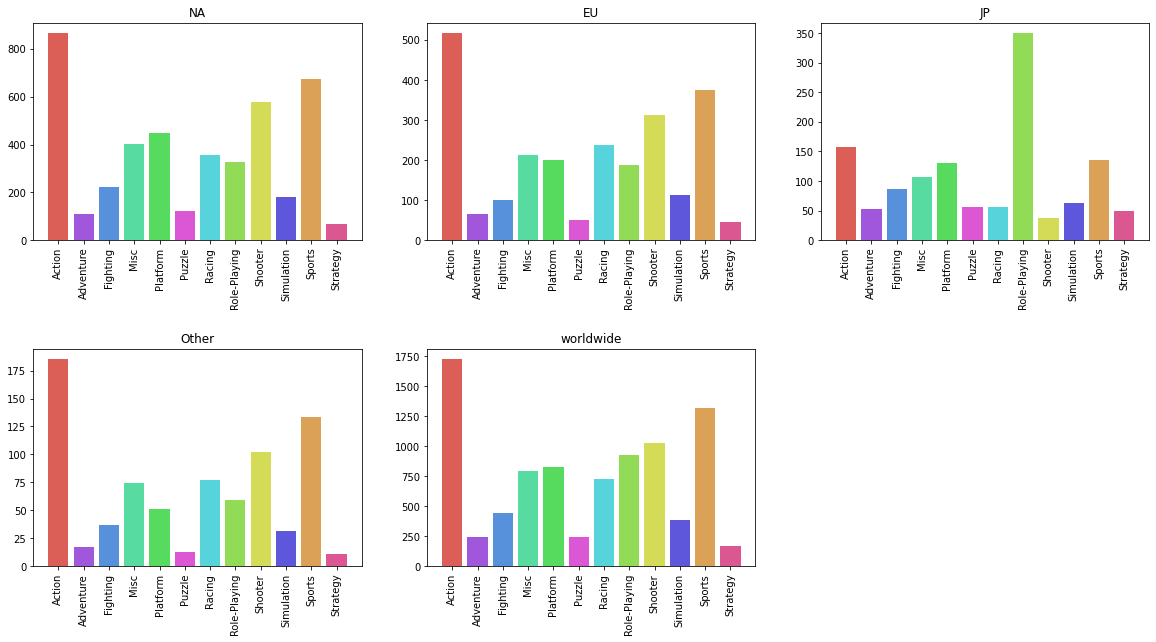

In [414]:
plt.figure(figsize=(20,10))

# 컬러 빠레트 : cubehelix rocket viridis hls Spectral
color_p = sns.color_palette('hls',len(genre_sorted))

# { 열이름 : 컬러 }
color_genre = {}
for i,n in enumerate(genre_sorted) :
  color_genre[n] = color_p[i]

for i in range(0,5) : 
  plt.subplot(2,3,i+1)
  plt.title(df1_pivot.columns[i])
  plt.bar(x = df1_pivot.index, height = df1_pivot.iloc[:,i], color = [color_genre[key] for key in df1_pivot.index])
  plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)

plt.show()

# x축 고정 (정렬x)

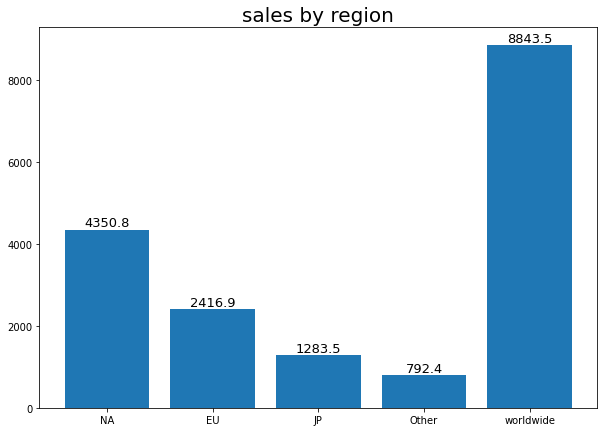

In [415]:
region = df1_pivot.sum()

plt.figure(figsize=(10,7))
plt.title('sales by region', size = 20)
bar = plt.bar(x = region.index, height = region)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 13)

plt.show()

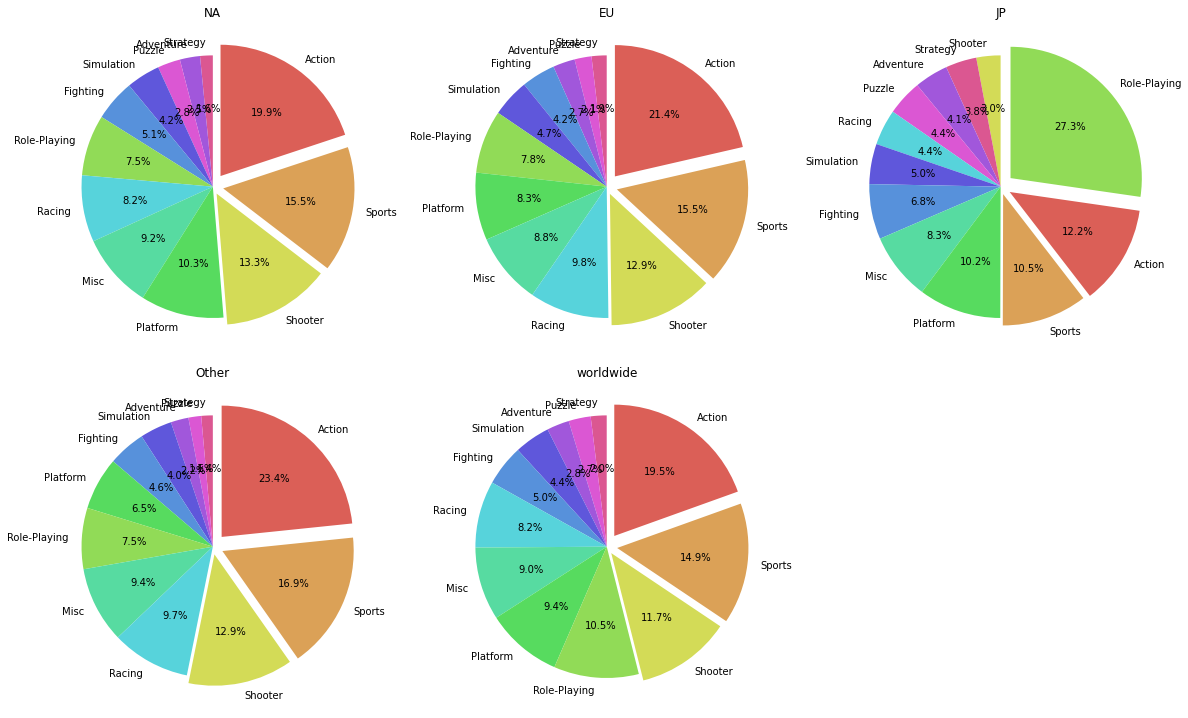

In [416]:
plt.figure(figsize=(20,20))

# 폭발!! 예술!!
explode = [0]*len(df1_pivot.index)
explode[-1] = 0.1
explode[-2] = 0.08
explode[-3] = 0.06


for i in range(0,5) :
  plt.subplot(2,3,i+1)
  plt.title(df1_pivot.columns[i])
  data = df1_pivot.iloc[:,i].sort_values()
  plt.pie(data, labels=data.index, autopct='%.1f%%', startangle=90, counterclock=True, colors = [color_genre[key] for key in data.index], explode = explode)
  

plt.subplots_adjust(wspace = 0.2, hspace = 0, top=0.5, bottom = 0)
plt.show()


# 수정방향
# 글씨 겹치는거
# top3 밑은 색을 흐리게 하는 방법도 좋아보임

# 특징
# 같은 색 - 같은 장르
# 비율 큰거부터 정렬

# --------------------------------------2. 연도별 게임 트렌드-----------------------------------------

In [417]:
df_worldwide_genre_year = df1_worldwide_pivot.T.drop('add_all')

In [418]:
df_worldwide_genre_year = df_worldwide_genre_year[genre_sorted]

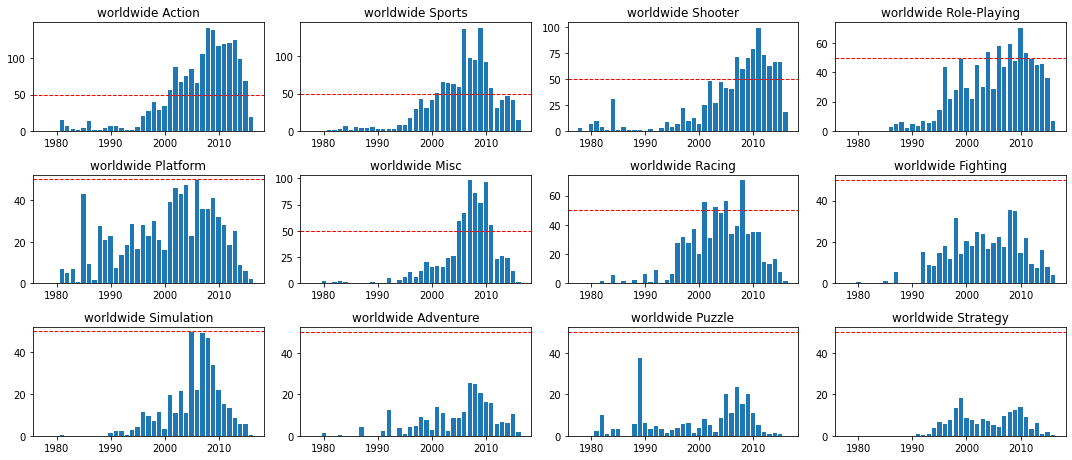

In [484]:
plt.figure(figsize=(15,6.5))
for i in range(0,12) : 
  plt.subplot(3,4,i+1)
  plt.title('worldwide ' + df_worldwide_genre_year.columns[i])
  plt.bar(x = df_worldwide_genre_year.index, height = df_worldwide_genre_year.iloc[:,i])
  plt.axhline(y=50, color='r', linewidth=1, linestyle = '--')

plt.tight_layout()

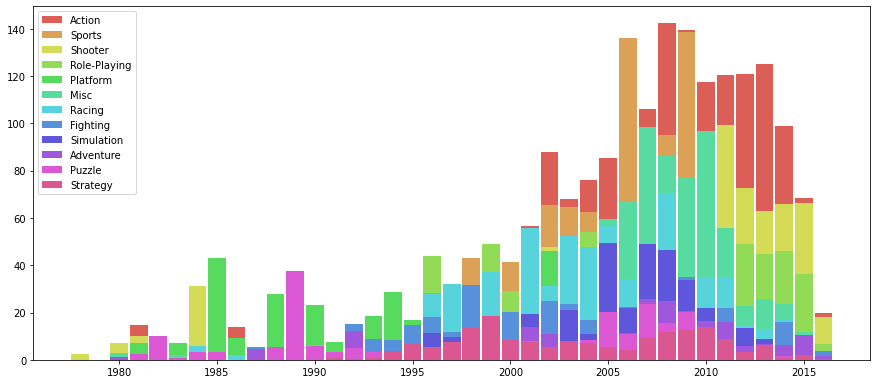

In [420]:
plt.figure(figsize=(15,6.5))

# worldwide 출고량이 높은거부터 뒤에 배치해서 겹쳐서 출력
for n in genre_sorted :
  plt.bar(x = df_worldwide_genre_year.index, height = df_worldwide_genre_year[n], color = color_genre[n], width = 0.9)

plt.legend(genre_sorted)
plt.show()

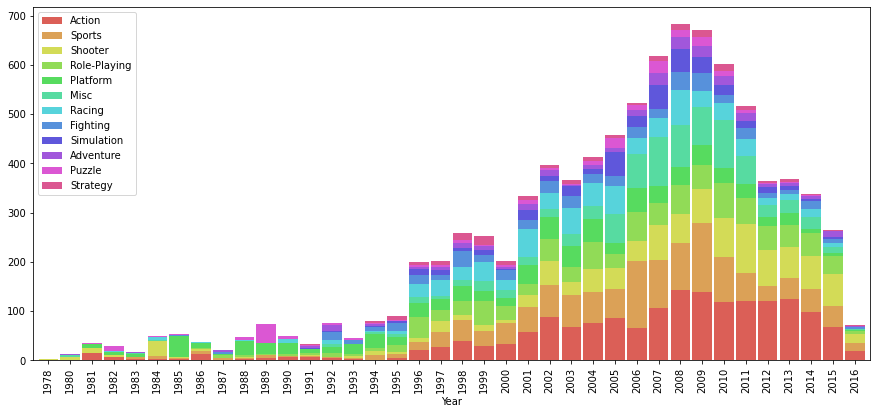

In [421]:
df_worldwide_genre_year.plot(kind = 'bar', stacked=True, color = [color_genre[d] for d in df_worldwide_genre_year.columns], figsize=(15,6.5), width = 0.9)
plt.legend(df_worldwide_genre_year.columns)
plt.show()

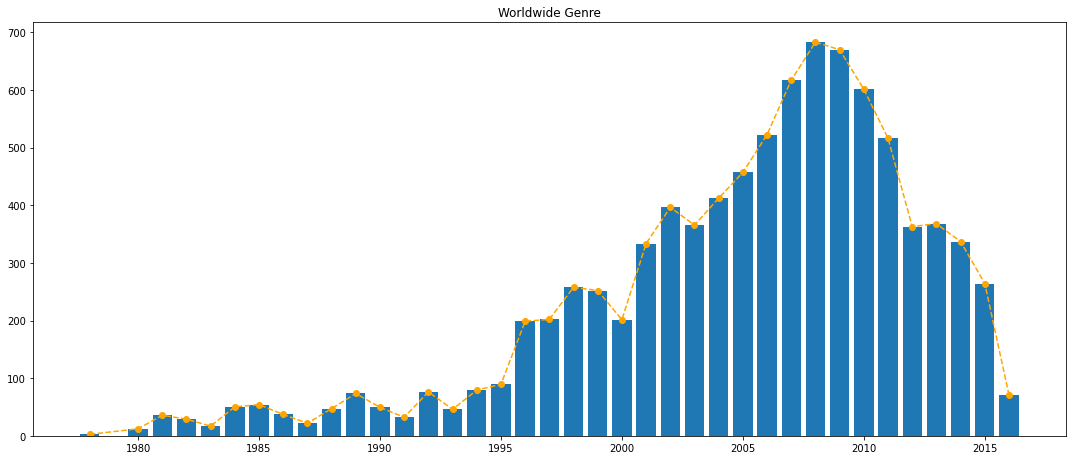

In [424]:
plt.figure(figsize=(15,6.5))

plt.title('Worldwide Genre')
plt.bar(x = df_worldwide_genre_year.index, height = df_worldwide_genre_year.sum(axis = 1))
plt.plot(df_worldwide_genre_year.index, df_worldwide_genre_year.sum(axis = 1), color='orange', linestyle='--', marker='o') ## 선 그래프 출력
plt.tight_layout()

# 2016년 갑자기 판매량이 팍 준다.
# 2017~2020 까지 데이터가 거의 없다. 트랜드를 보고싶은거면 최근 데이터가 채워질 필요가 있음
# 2017년 이후는 제거하기


# --------------------------------------a. Platform   별로-----------------------------------------

In [425]:
# 히트작 정렬
hit = df_nonull.sort_values('sum_Sales', ascending=False)

In [426]:
# 플랫폼별 시장 수요

In [427]:
# 전세계 플랫폼당 연도별 판매량 추이 df1_worldwide_pivot
df2_worldwide_pivot = pd.pivot_table(df_nonull, index = 'Platform',columns='Year', values='sum_Sales', aggfunc = np.sum)
df2_worldwide_pivot = df2_worldwide_pivot.fillna(0)
df2_worldwide_pivot['add_all'] = df2_worldwide_pivot.sum(axis = 1)

In [428]:
# NA 플랫폼당 연도별 판매량 추이 df1_NA_pivot
df2_NA_pivot = pd.pivot_table(df_nonull, index = 'Platform',columns='Year', values='NA_Sales', aggfunc = np.sum)
df2_NA_pivot = df2_NA_pivot.fillna(0)
df2_NA_pivot['add_all'] = df2_NA_pivot.sum(axis = 1)

In [429]:
# EU 플랫폼당 연도별 판매량 추이 df1_EU_pivot
df2_EU_pivot = pd.pivot_table(df_nonull, index = 'Platform',columns='Year', values='EU_Sales', aggfunc = np.sum)
df2_EU_pivot = df2_EU_pivot.fillna(0)
df2_EU_pivot['add_all'] = df2_EU_pivot.sum(axis = 1)

In [430]:
# JP 플랫폼당 연도별 판매량 추이 df1_JP_pivot
df2_JP_pivot = pd.pivot_table(df_nonull, index = 'Platform',columns='Year', values='JP_Sales', aggfunc = np.sum)
df2_JP_pivot = df2_JP_pivot.fillna(0)
df2_JP_pivot['add_all'] = df2_JP_pivot.sum(axis = 1)

In [431]:
# others 플랫폼당 연도별 판매량 추이 df1_Other_pivot
df2_Other_pivot = pd.pivot_table(df_nonull, index = 'Platform',columns='Year', values='Other_Sales', aggfunc = np.sum)
df2_Other_pivot = df2_Other_pivot.fillna(0)
df2_Other_pivot['add_all'] = df2_Other_pivot.sum(axis = 1)

In [432]:
# 지역별 플랫폼 선호도 (연도 제거) df1_pivot
df2_pivot = pd.DataFrame()
df2_pivot['NA'] = df2_NA_pivot['add_all']
df2_pivot['EU'] = df2_EU_pivot['add_all']
df2_pivot['JP'] = df2_JP_pivot['add_all']
df2_pivot['Other'] = df2_Other_pivot['add_all']
df2_pivot['worldwide'] = df2_worldwide_pivot['add_all']


In [433]:
df2_pivot = df2_pivot.sort_values('worldwide', ascending = False)

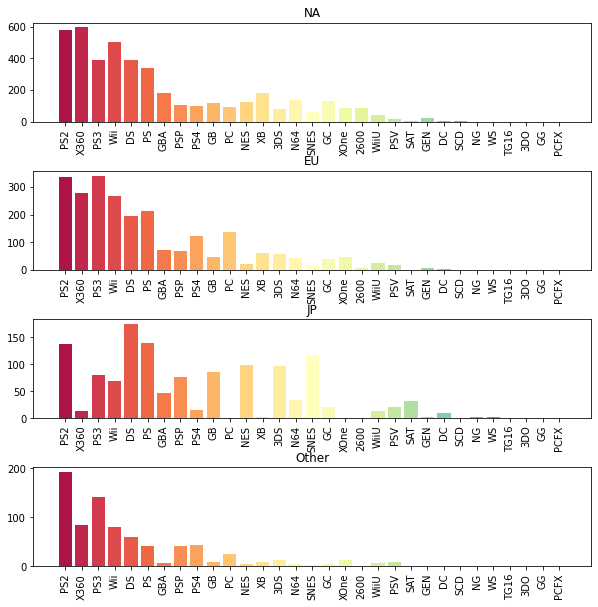

In [434]:
plt.figure(figsize=(10,10))

# 컬러 빠레트 : cubehelix rocket viridis hls Spectral
color_p = sns.color_palette('Spectral',len(df2_pivot.index))

# { 열이름 : 컬러 }
color_platform = {}
for i,n in enumerate(df2_pivot.index) :
  color_platform[n] = color_p[i]

for i in range(0,4) : 
  plt.subplot(4,1,i+1)
  plt.title(df2_pivot.columns[i])
  plt.bar(x = df2_pivot.index, height = df2_pivot.iloc[:,i], color = [color_platform[key] for key in df2_pivot.index])
  plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)

plt.show()

# x축 고정 (정렬x)

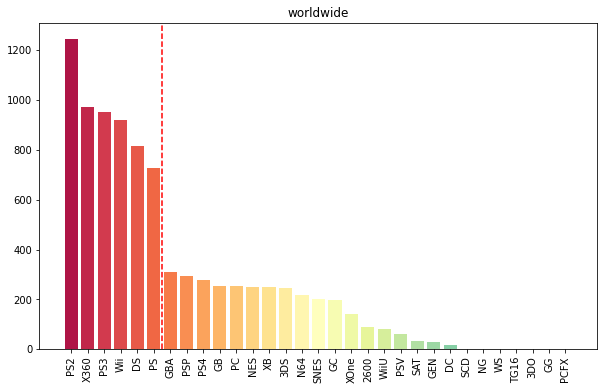

In [435]:
plt.figure(figsize=(10,6))
plt.title(df2_pivot.columns[4])
plt.bar(x = df2_pivot.index, height = df2_pivot.iloc[:,4], color = [color_platform[key] for key in df2_pivot.index])
plt.xticks(rotation=90)
plt.axvline(x=5.5, linestyle='--', color = 'r')

plt.show()

In [436]:
hit_platform = df2_pivot.iloc[:6].index

In [437]:
# top 6 플랫폼 정렬
hit_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='Platform')

In [471]:
# top 6 플랫폼만 남겨서 열 순서 정렬
df2_top6 = df_nonull.query("(Platform == 'PS2') or (Platform == 'X360') or (Platform == 'PS3') or (Platform == 'Wii') or (Platform == 'DS') or (Platform == 'PS')")

In [439]:
df2_top6.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
0,Rock Band,X360,2007,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
2,Call of Duty 3,Wii,2006,Shooter,Activision,1.19,0.84,0.0,0.23,2.26
4,LEGO Batman: The Videogame,Wii,2008,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
5,wwe Smackdown vs. Raw 2006,PS2,2009,Fighting,THQ,1.57,1.02,0.0,0.41,3.00
6,MVP Baseball 2004,PS2,2004,Sports,Electronic Arts,1.10,0.06,0.0,0.18,1.34


In [440]:
df2_year_pivot = pd.pivot_table(df2_top6, index = 'Year',columns='Platform', values='sum_Sales', aggfunc = np.sum)
df2_year_pivot = df2_year_pivot.fillna(0)
df2_year_pivot = df2_year_pivot[hit_platform]

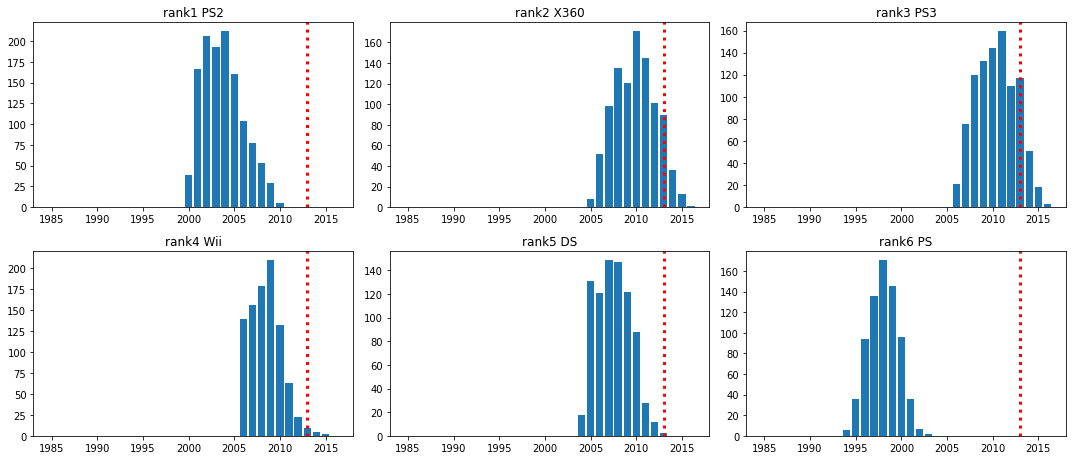

In [441]:
plt.figure(figsize=(15,6.5))
for i in range(0,6) : 
  plt.subplot(2,3,i+1)
  plt.title('rank'+ str(i+1) + ' '+df2_year_pivot.columns[i])
  plt.bar(x = df2_year_pivot.index, height = df2_year_pivot.iloc[:,i])
  plt.axvline(x=2013, color='r', linestyle=':', linewidth=3)

plt.tight_layout()

In [449]:
df2_Genre_pivot = pd.pivot_table(df2_top6, index = 'Genre',columns='Platform', values='sum_Sales', aggfunc = np.sum)
df2_Genre_pivot = df2_Genre_pivot.fillna(0)
df2_Genre_pivot = df2_Genre_pivot[hit_platform]

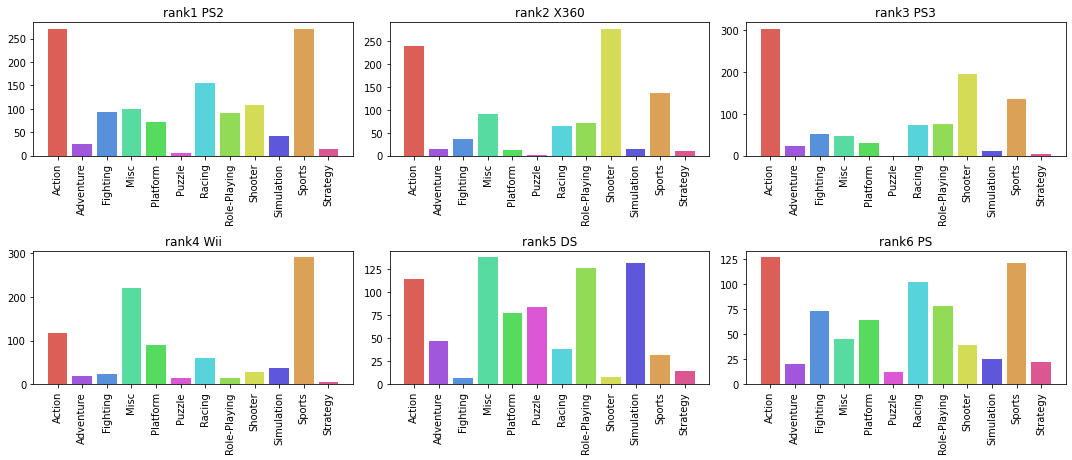

In [455]:
plt.figure(figsize=(15,6.5))
for i in range(0,6) : 
  plt.subplot(2,3,i+1)
  plt.title('rank'+ str(i+1) + ' '+df2_Genre_pivot.columns[i])
  plt.bar(x = df2_Genre_pivot.index, height = df2_Genre_pivot.iloc[:,i], color = [color_genre[key] for key in df2_Genre_pivot.index])
  plt.xticks(rotation=90)

plt.tight_layout()

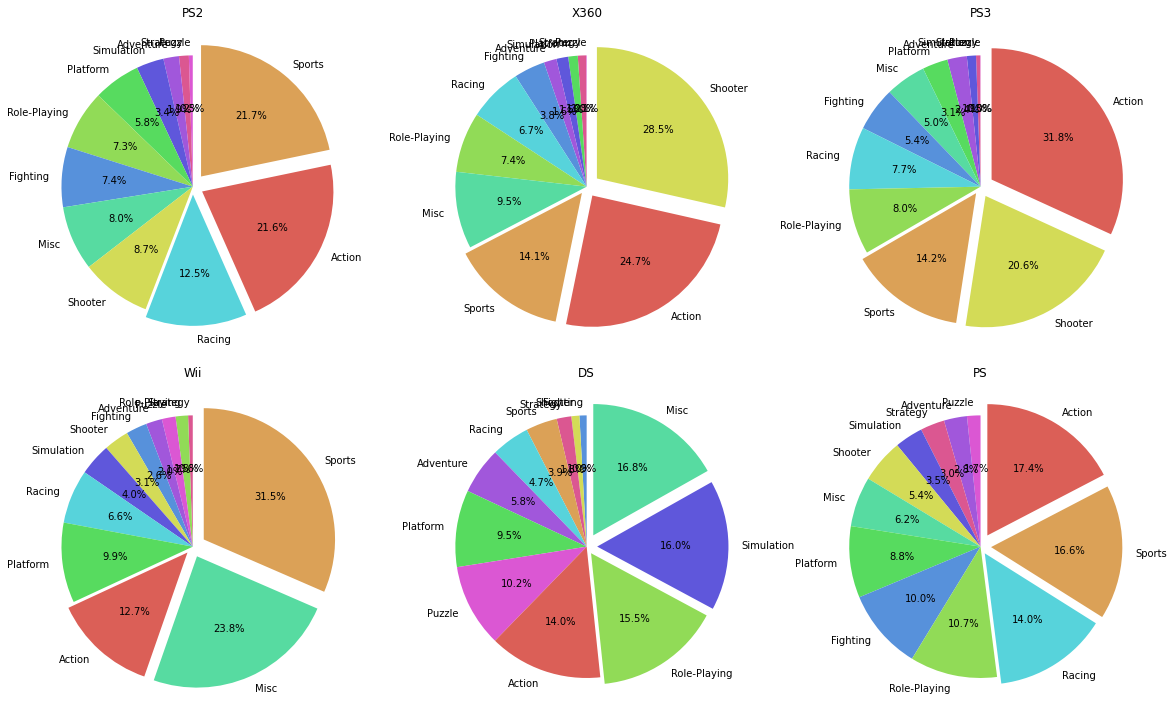

In [456]:
plt.figure(figsize=(20,20))

# 폭발!! 예술!!
explode = [0]*len(df2_Genre_pivot.index)
explode[-1] = 0.1
explode[-2] = 0.08
explode[-3] = 0.06


for i in range(0,6) :
  plt.subplot(2,3,i+1)
  plt.title(df2_Genre_pivot.columns[i])
  data = df2_Genre_pivot.iloc[:,i].sort_values()
  plt.pie(data, labels=data.index, autopct='%.1f%%', startangle=90, counterclock=True, colors = [color_genre[key] for key in data.index], explode = explode)
  

plt.subplots_adjust(wspace = 0.2, hspace = 0, top=0.5, bottom = 0)
plt.show()

In [465]:
df2_Genre_pivot

Platform,PS2,X360,PS3,Wii,DS,PS
Genre,,,,,,
Action,269.68,239.60,302.61,117.24,113.99,126.64
Adventure,23.92,15.19,22.85,18.26,47.11,20.71
Fighting,92.20,37.09,51.71,23.81,7.20,72.74
Misc,99.14,91.84,47.44,219.11,137.52,44.88
Platform,72.13,11.37,29.74,90.70,77.34,64.22
Puzzle,5.94,0.73,0.45,15.53,83.39,12.06
Racing,155.55,64.91,73.09,61.10,38.54,102.49
Role-Playing,91.61,71.96,76.41,14.08,126.49,78.40
Shooter,108.20,277.14,195.79,28.42,8.10,39.33


In [478]:
# 컬러 빠레트 : cubehelix rocket viridis hls Spectral
color_p = sns.color_palette('Spectral',len(hit_platform))

# { 열이름 : 컬러 }
color_platform6 = {}
for i,n in enumerate(hit_platform) :
  color_platform6[n] = color_p[i]

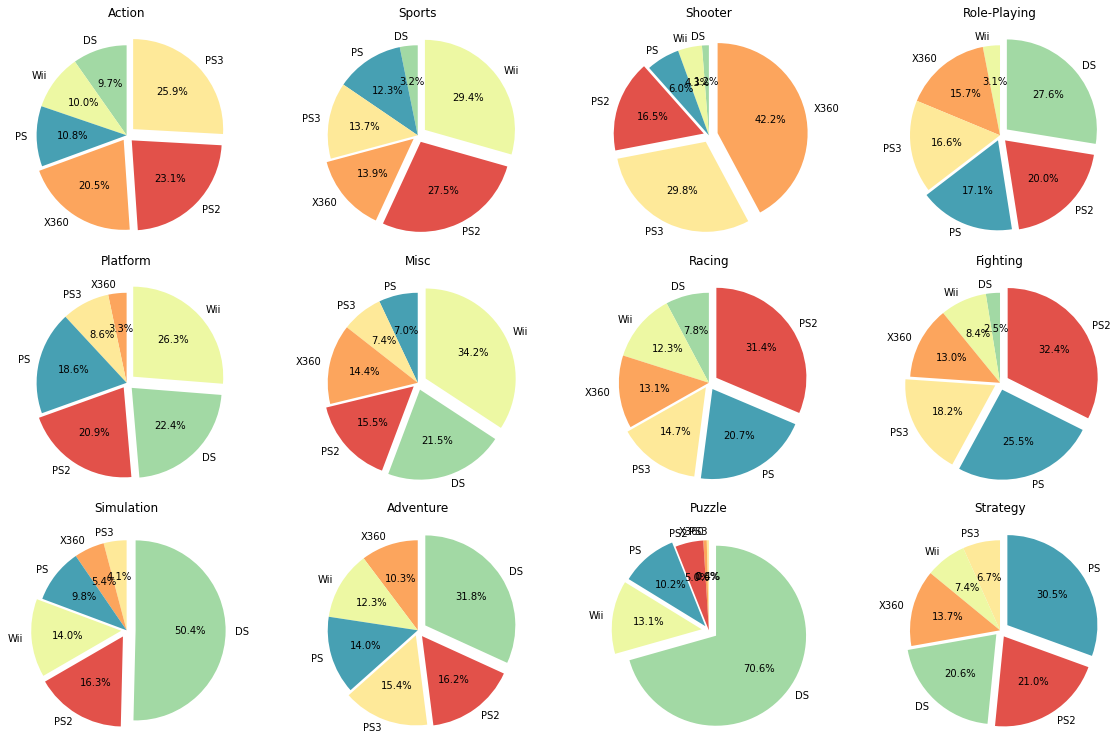

In [487]:
# 장르별 플랫폼 탑티어

plt.figure(figsize=(20,20))

# 폭발!! 예술!!
explode = [0]*len(df2_Genre_pivot.columns)
explode[-1] = 0.1
explode[-2] = 0.08
explode[-3] = 0.06

df2_Genre_pivot_T = df2_Genre_pivot.T[genre_sorted]

for i in range(0,12) :
  plt.subplot(3,4,i+1)
  plt.title(df2_Genre_pivot_T.columns[i])
  data = df2_Genre_pivot_T.iloc[:,i].sort_values()
  plt.pie(data, labels=data.index, autopct='%.1f%%', startangle=90, counterclock=True, colors = [color_platform6[key] for key in data.index], explode=explode)
  

plt.subplots_adjust(wspace = 0.2, hspace = 0.1, top=0.5, bottom = 0)
plt.show()

# -----------------퍼블리셔별---------------------

In [ ]:
# 전세계 퍼블리셔당 연도별 판매량 추이 df1_worldwide_pivot
df3_worldwide_pivot = pd.pivot_table(df_nonull, index = 'Publisher',columns='Year', values='sum_Sales', aggfunc = np.sum)
df3_worldwide_pivot = df3_worldwide_pivot.fillna(0)
df3_worldwide_pivot['add_all'] = df3_worldwide_pivot.sum(axis = 1)

In [ ]:
by_publisher = df3_worldwide_pivot[['add_all']].sort_values('add_all', ascending = False)

In [ ]:
by_publisher_up_13 = by_publisher.query("add_all > 150")

In [ ]:
by_publisher_up_13

In [ ]:
# 회사이름 넣어서 회사별 히트작 확인
hit.query("Publisher == 'Atari'").head(10)

#---------------------출고량 높은 게임에 대한 분석---------------------

In [489]:
hit.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_Sales
2889,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4147,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12350,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3322,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7707,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1221,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6830,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
2993,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16210,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10314,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# ---------------------------+A.1 닌텐도 제거? 2000년 이후만으로 트렌드 분석----------------------------

In [ ]:
plt.bar(x = df3_worldwide_pivot)

In [ ]:
df_no_nintendo = hit.query("Publisher != 'Nintendo'")

In [ ]:
df_no_nintendo.head(30)